<a href="https://colab.research.google.com/github/OM-VIT/Python-Machine-Learning-Notebooks/blob/main/Hybrid_algo_(LR%2CRF%2CDT%2CNB)_90_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the data
dataset = pd.read_csv('/content/drive/MyDrive/Phishing Website Detection Dataset /phishing_site_urls.csv')
dataset.head()


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
dataset.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [ ]:
#Checking the shape of the dataset
dataset.shape

(549346, 2)

In [ ]:
#Listing the features of the dataset
dataset.columns

Index(['URL', 'Label'], dtype='object')

In [ ]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
dataset.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

Data Visualizations

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(dataset.Label.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


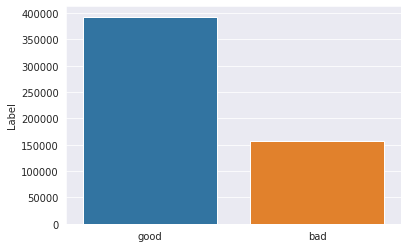

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

Data Standardization

In [ ]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')	# make tokens after splitting by slash
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	# make tokens after splitting by dash
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	# make tokens after splitting by dot
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	#remove redundant tokens
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
    return total_Tokens

In [ ]:
# Labels
y = dataset["Label"]

In [ ]:
# Features
url_list = dataset["URL"]

In [ ]:
# Using Custom Tokenizer
vectorizer = TfidfVectorizer(tokenizer=makeTokens)

In [ ]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(549346, 912674) (494411, 912674) (54935, 912674)


In [ ]:
#Input = test data article
test=["serviciosbys.com/paypal.cgi.bin.get-into.herf.secure.dispatch35463256rzr321654641dsf654321874/href/href/href/secure/center/update/limit/seccure/4d7a1ff5c55825a2e632a679c2fd5353/"]

Training the Model

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# create lr object
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Accuracy of Our Model with our Custom Token
Accuracy= lr.score(X_test, y_test)
print("Accuracy ",lr.score(X_test, y_test))

Accuracy  0.9593155547465186


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.88      0.98      0.93     14123
        Good       0.99      0.95      0.97     40812

    accuracy                           0.96     54935
   macro avg       0.94      0.96      0.95     54935
weighted avg       0.96      0.96      0.96     54935


CONFUSION MATRIX FOR LOGESTIC REGRESSION


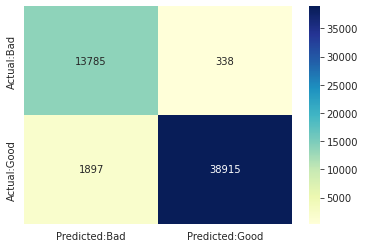

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR LOGESTIC REGRESSION')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# accuracy score on the test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)


In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9794484390643488



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.99      0.96     14951
        Good       0.99      0.98      0.99     39984

    accuracy                           0.98     54935
   macro avg       0.97      0.98      0.97     54935
weighted avg       0.98      0.98      0.98     54935


CONFUSION MATRIX FOR MULTINOMIAL NAIVE BAYES


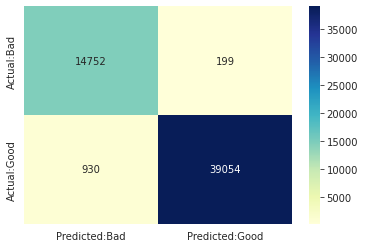

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(nb.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(nb.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR MULTINOMIAL NAIVE BAYES')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
#Predictions form all the above algorithms are either 1 or 0 
#where 1 denotes the real url and 0 denotes the fake url
heva=int(Accuracy)+int(test_data_accuracy)
#HEVA = Hybrid Ensembled Voting algorithm
print(heva)

0


In [ ]:
#if HEVA greater than or equal to 3 then REAL else FAKE
news=""
if heva>=1:
    news='real url'
else:
    news='phishing url'
print(news)

phishing url


In [ ]:
from sklearn.ensemble import VotingClassifier
#hard-vote:the predicted output class is a class with the highest majority of votes
#soft-vote:the output class is the prediction based on the average of probability given to that class.

**1.Logestic Regression + MultinomialNB**

In [ ]:
# group / ensemble of models 
estimator = [] 
estimator.append(('LR', LogisticRegression())) 
estimator.append(('NB', MultinomialNB(alpha=1, class_prior=None, fit_prior=True))) 

In [ ]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Hard Voting Score  0.9783744425229817


In [ ]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Soft Voting Score  0.9725675798671157



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.97      0.96     15340
        Good       0.99      0.98      0.98     39595

    accuracy                           0.98     54935
   macro avg       0.97      0.98      0.97     54935
weighted avg       0.98      0.98      0.98     54935


CONFUSION MATRIX FOR LOGESTIC REGRESSION + MULTINOMIAL NAIVE BAYES


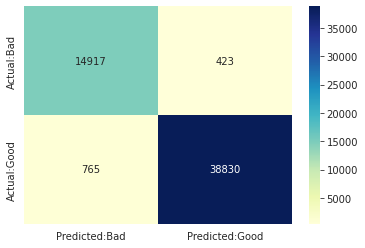

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR LOGESTIC REGRESSION + MULTINOMIAL NAIVE BAYES')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**Decision Tree**

In [ ]:
# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# accuracy score on the test data
X_test_prediction = tree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7985073268408118



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.33      0.91      0.48      5635
        Good       0.99      0.79      0.88     49300

    accuracy                           0.80     54935
   macro avg       0.66      0.85      0.68     54935
weighted avg       0.92      0.80      0.83     54935


CONFUSION MATRIX FOR DECISION TREE


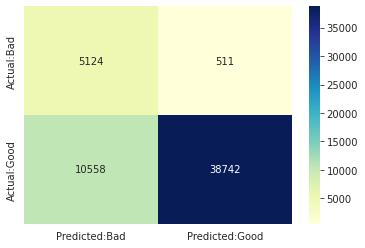

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(tree.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(tree.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR DECISION TREE')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**Random Forest**

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
X_test_prediction = forest.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7145353599708747



CLASSIFICATION REPORT



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00         0
        Good       1.00      0.71      0.83     54935

    accuracy                           0.71     54935
   macro avg       0.50      0.36      0.42     54935
weighted avg       1.00      0.71      0.83     54935


CONFUSION MATRIX FOR RANDOM FOREST


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


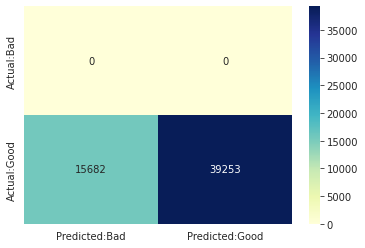

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(forest.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(forest.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR RANDOM FOREST')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**2.Decision Tree + Random Forest**

In [ ]:
# group / ensemble of models 
estimator2 = [] 
estimator2.append(('tree',DecisionTreeClassifier(max_depth = 5))) 
estimator2.append(('forest', RandomForestClassifier(max_depth=5))) 

In [ ]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator2, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

Hard Voting Score  0.7985073268408118


In [ ]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator2, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

Soft Voting Score  0.7915900609811596



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.33      0.91      0.48      5635
        Good       0.99      0.79      0.88     49300

    accuracy                           0.80     54935
   macro avg       0.66      0.85      0.68     54935
weighted avg       0.92      0.80      0.83     54935


CONFUSION MATRIX FOR DECISION TREE + RANDOM FOREST


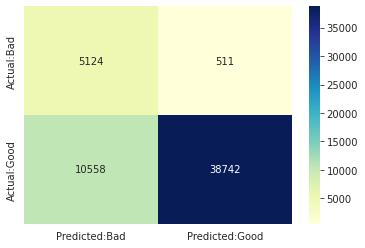

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR DECISION TREE + RANDOM FOREST')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**3.Logestic Regression + Decision Tree**

In [ ]:
# group / ensemble of models 
estimator3 = [] 
estimator3.append(('LR', LogisticRegression())) 
estimator3.append(('tree',DecisionTreeClassifier(max_depth = 5))) 

In [ ]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator3, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Hard Voting Score  0.9526167288613816


In [ ]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator3, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Soft Voting Score  0.9156639665058706



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.88      0.95      0.91     14549
        Good       0.98      0.95      0.97     40386

    accuracy                           0.95     54935
   macro avg       0.93      0.95      0.94     54935
weighted avg       0.95      0.95      0.95     54935


CONFUSION MATRIX FOR LOGESTIC REGRESSION + DECICION TREE


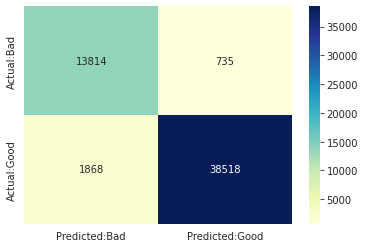

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR LOGESTIC REGRESSION + DECICION TREE')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

## *4.Naive Bayes + Random Forest** **bold text**

In [ ]:
# group / ensemble of models 
estimator4 = [] 
estimator4.append(('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))) 
estimator4.append(('forest', RandomForestClassifier(max_depth=5))) 

In [ ]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator4, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

Hard Voting Score  0.9794484390643488


In [ ]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator4, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

Soft Voting Score  0.9494311458996997



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.99      0.96     14951
        Good       0.99      0.98      0.99     39984

    accuracy                           0.98     54935
   macro avg       0.97      0.98      0.97     54935
weighted avg       0.98      0.98      0.98     54935


CONFUSION MATRIX FOR NAIVE BAYES + RANDOM FOREST


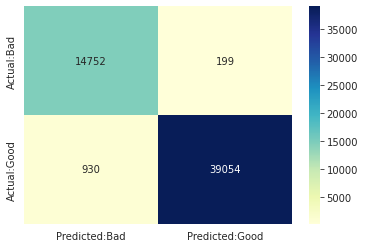

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR NAIVE BAYES + RANDOM FOREST')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**5.Logestic Regression + Random Forest**

In [ ]:
estimator5 = [] 
estimator5.append(('LR', LogisticRegression()))
estimator5.append(('forest', RandomForestClassifier(max_depth=5))) 

In [ ]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator5, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Hard Voting Score  0.9593155547465186


In [ ]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator5, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Soft Voting Score  0.9315008646582325



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.88      0.98      0.93     14123
        Good       0.99      0.95      0.97     40812

    accuracy                           0.96     54935
   macro avg       0.94      0.96      0.95     54935
weighted avg       0.96      0.96      0.96     54935


CONFUSION MATRIX FOR LOGESTIC REGRESSION + RANDOM FOREST


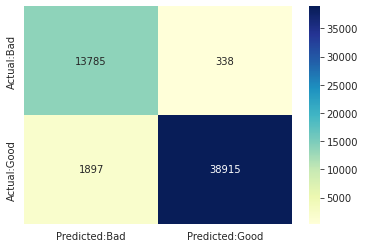

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR LOGESTIC REGRESSION + RANDOM FOREST')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**6.Naive Bayes + Decision Tree**

In [ ]:
estimator6 = [] 
estimator6.append(('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))) 
estimator6.append(('tree',DecisionTreeClassifier(max_depth = 5))) 

In [ ]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator6, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

Hard Voting Score  0.9719122599435697


In [ ]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator6, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

Soft Voting Score  0.935596614180395



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.96      0.95     15475
        Good       0.98      0.98      0.98     39460

    accuracy                           0.97     54935
   macro avg       0.96      0.97      0.97     54935
weighted avg       0.97      0.97      0.97     54935


CONFUSION MATRIX FOR NAIVE BAYES + DECICION TREE


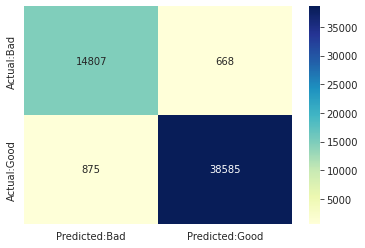

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR NAIVE BAYES + DECICION TREE')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

**7.LR + NB + DT + RF**

In [ ]:
# group / ensemble of models 
estimator7 = [] 
estimator7.append(('LR', LogisticRegression())) 
estimator7.append(('NB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))) 
estimator7.append(('tree',DecisionTreeClassifier(max_depth = 5))) 
estimator7.append(('forest', RandomForestClassifier(max_depth=5))) 

In [ ]:
# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator7, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 
  
# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test,y_pred) 
print("Hard Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Hard Voting Score  0.959625011377082


In [ ]:
# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator7, voting ='soft') 
vot_soft.fit(X_train,y_train) 
y_pred2 = vot_soft.predict(X_test)  

# using accuracy_score 
score = accuracy_score(y_test, y_pred2) 
print("Soft Voting Score ",score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Soft Voting Score  0.9366160007281332



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.87      0.99      0.92     13856
        Good       1.00      0.95      0.97     41079

    accuracy                           0.96     54935
   macro avg       0.93      0.97      0.95     54935
weighted avg       0.96      0.96      0.96     54935


CONFUSION MATRIX FOR LR+DT+RF+NB


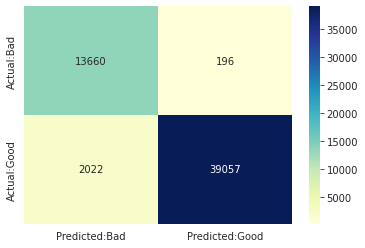

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(vot_hard.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(vot_hard.predict(X_test), y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX FOR LR+DT+RF+NB')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
prediction=nb.predict(X_test)

In [ ]:
X_predict = ["facebook.com"]

In [ ]:
X_predict = vectorizer.transform(X_predict)
New_predict = nb.predict(X_predict)


In [ ]:
print(New_predict)

['good']
